In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [59]:
df = pd.read_csv("COVID19-Historical-V2-CNTY.csv")
print(df.columns)
df=df[["GEOName", "Date", "POS_7DAYAVG_CP","DTH_NEW_CP"]]
df=df.dropna()
df["Date"] = pd.to_datetime(df["Date"]).dt.date
df = df.replace(-999,0)
df

Index(['OBJECTID', 'GEOID', 'GEO', 'GEOName', 'RptDt', 'Date', 'NEG',
       'NEG_NEW', 'NEG_7DAYAVG', 'POS_CP',
       ...
       'IC_Y_40_49_CP', 'IC_Y_50_59_CP', 'IC_Y_60_69_CP', 'IC_Y_70_79_CP',
       'IC_Y_80_89_CP', 'IC_Y_90_CP', 'TESTS_POS_CONF', 'TESTS_POS_CONF_NEW',
       'TESTS_POS_CONF_7DAYAVG', 'PercentNAATPos'],
      dtype='object', length=129)


,GEOName,Date,POS_7DAYAVG_CP,DTH_NEW_CP
0,Barron,2020-01-22,0.00,0
1,Calumet,2020-01-22,0.00,0
2,Chippewa,2020-01-22,0.00,0
3,Dunn,2020-01-22,0.00,0
4,Eau Claire,2020-01-22,0.00,0
...,...,...,...,...
71059,Racine,2022-10-04,33.86,0
71060,Sawyer,2022-10-04,2.57,0
71061,Richland,2022-10-04,1.57,0
71062,Winnebago,2022-10-04,28.29,0


In [60]:
#create new column with date after two weeks 

deaths=df[["GEOName", "Date", "DTH_NEW_CP"]].copy()
deaths["Date"] = deaths["Date"] - pd.Timedelta(days=14)
deaths = deaths.set_index(deaths["GEOName"] + "_" + deaths["Date"].astype(str))

In [68]:
df = df.set_index(df["GEOName"] + "_" + df["Date"].astype(str))
df.head()

,GEOName,Date,POS_7DAYAVG_CP,DTH_NEW_CP,DTH_NEW_2WK
Barron_2020-01-22,Barron,2020-01-22,0.0,0,0.0
Calumet_2020-01-22,Calumet,2020-01-22,0.0,0,0.0
Chippewa_2020-01-22,Chippewa,2020-01-22,0.0,0,0.0
Dunn_2020-01-22,Dunn,2020-01-22,0.0,0,0.0
Eau Claire_2020-01-22,Eau Claire,2020-01-22,0.0,0,0.0


In [69]:
df["DTH_NEW_2WK"] = deaths["DTH_NEW_CP"]
df.dropna()
df.head()

,GEOName,Date,POS_7DAYAVG_CP,DTH_NEW_CP,DTH_NEW_2WK
Barron_2020-01-22,Barron,2020-01-22,0.0,0,0.0
Calumet_2020-01-22,Calumet,2020-01-22,0.0,0,0.0
Chippewa_2020-01-22,Chippewa,2020-01-22,0.0,0,0.0
Dunn_2020-01-22,Dunn,2020-01-22,0.0,0,0.0
Eau Claire_2020-01-22,Eau Claire,2020-01-22,0.0,0,0.0


In [67]:
df.to_csv("wi_covid.csv", index = False)

In [70]:
df.mean()

C:\Users\MOHAME~1\AppData\Local\Temp/ipykernel_7820/3698961737.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.mean()


POS_7DAYAVG_CP    26.290733
DTH_NEW_CP         0.155283
DTH_NEW_2WK        0.157517
dtype: float64

## Analysis

<AxesSubplot:xlabel='DTH_NEW_CP', ylabel='DTH_NEW_2WK'>

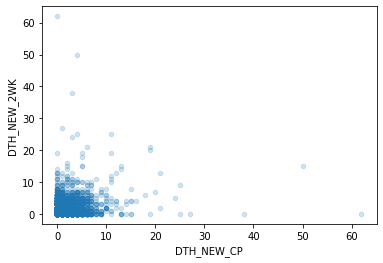

In [91]:
df.plot.scatter(x="DTH_NEW_CP", y="DTH_NEW_2WK", alpha=0.2)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [99]:
df = pd.read_csv("wi_covid.csv")
df = df.dropna()

df.head()


,GEOName,Date,POS_7DAYAVG_CP,DTH_NEW_CP,DTH_NEW_2WK
0,Barron,2020-01-22,0.0,0,0.0
1,Calumet,2020-01-22,0.0,0,0.0
2,Chippewa,2020-01-22,0.0,0,0.0
3,Dunn,2020-01-22,0.0,0,0.0
4,Eau Claire,2020-01-22,0.0,0,0.0


In [100]:
df[["DTH_NEW_CP"]]

,DTH_NEW_CP
0,0
1,0
2,0
3,0
4,0
...,...
70051,0
70052,0
70053,0
70054,0


In [102]:
lr.fit(df[["DTH_NEW_CP"]], df["DTH_NEW_2WK"])

LinearRegression()

In [108]:
fit_df = pd.DataFrame({"DTH_NEW_CP": range(0,100)})
fit_df["Predicted_DTH_NEW_2WK"] = lr.predict(fit_df)
fit_df

,DTH_NEW_CP,Predicted_DTH_NEW_2WK
0,0,0.105028
1,1,0.439376
2,2,0.773724
3,3,1.108072
4,4,1.442420
...,...,...
95,95,31.868089
96,96,32.202437
97,97,32.536785
98,98,32.871133


<AxesSubplot:xlabel='DTH_NEW_CP', ylabel='DTH_NEW_2WK'>

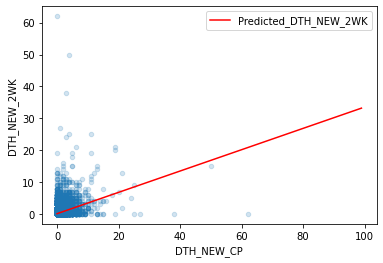

In [109]:
ax = fit_df.plot.line(x="DTH_NEW_CP", y="Predicted_DTH_NEW_2WK", color="red")

df.plot.scatter(x="DTH_NEW_CP", y="DTH_NEW_2WK", alpha=0.2, ax=ax)

In [110]:
lr.score(df[["DTH_NEW_CP"]], df["DTH_NEW_2WK"]) #check variance (0 to 1)

0.11169480162111034